# Loading Dataset 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
raw_data = pd.read_csv('total_data.csv') # Change this later if needed
#Dropping Multiple Indexes
raw_data = raw_data.drop(raw_data.columns[0],axis= 1)
raw_data.head()

,away_current_pos,away_last_yr_pos,away_prev_game_perf,away_team_av_points,away_team_av_points_conceded,away_team_away_form,away_team_form,away_team_rest_time,away_win_percentage,h2h_form,home_current_pos,home_last_yr_pos,home_prev_game_perf,home_team_av_points,home_team_av_points_conceded,home_team_form,home_team_home_form,home_team_rest_time,home_win_percentage,match_importance,result
0,12,12,0,20.0,20.00,0.0,0.0,7,50.0,0.0,2,2,0,20.00,20.00,0.0,0.0,7,50.0,0,1
1,11,6,0,20.0,20.00,0.0,0.0,7,50.0,0.0,15,1,0,20.00,20.00,0.0,0.0,7,50.0,0,1
2,15,3,0,20.0,20.00,0.0,0.0,7,50.0,0.0,13,5,0,20.00,20.00,0.0,0.0,7,50.0,0,1
3,11,8,0,20.0,20.00,0.0,0.0,7,50.0,0.0,14,4,0,20.00,20.00,0.0,0.0,7,50.0,0,1
4,15,3,0,20.4,20.64,-0.2,-0.2,2,0.0,0.0,2,4,1,20.85,20.55,0.4,0.4,2,100.0,0,0


# Preprocessing 

In [38]:
X_raw = pd.DataFrame(data = raw_data)
X_raw = X_raw.drop(columns='result',axis = 1)
display.display(X_raw.head())
Y_raw = raw_data['result']
display.display(Y_raw.head())

,away_current_pos,away_last_yr_pos,away_prev_game_perf,away_team_av_points,away_team_av_points_conceded,away_team_away_form,away_team_form,away_team_rest_time,away_win_percentage,h2h_form,home_current_pos,home_last_yr_pos,home_prev_game_perf,home_team_av_points,home_team_av_points_conceded,home_team_form,home_team_home_form,home_team_rest_time,home_win_percentage,match_importance
0,12,12,0,20.0,20.00,0.0,0.0,7,50.0,0.0,2,2,0,20.00,20.00,0.0,0.0,7,50.0,0
1,11,6,0,20.0,20.00,0.0,0.0,7,50.0,0.0,15,1,0,20.00,20.00,0.0,0.0,7,50.0,0
2,15,3,0,20.0,20.00,0.0,0.0,7,50.0,0.0,13,5,0,20.00,20.00,0.0,0.0,7,50.0,0
3,11,8,0,20.0,20.00,0.0,0.0,7,50.0,0.0,14,4,0,20.00,20.00,0.0,0.0,7,50.0,0
4,15,3,0,20.4,20.64,-0.2,-0.2,2,0.0,0.0,2,4,1,20.85,20.55,0.4,0.4,2,100.0,0


0    1
1    1
2    1
3    1
4    0
Name: result, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 2022
x_train, x_test, y_train, y_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=RANDOM_SEED)
x_train, x_val, y_train, y_val = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=RANDOM_SEED)

In [40]:
x_train.describe()

,away_current_pos,away_last_yr_pos,away_prev_game_perf,away_team_av_points,away_team_av_points_conceded,away_team_away_form,away_team_form,away_team_rest_time,away_win_percentage,h2h_form,home_current_pos,home_last_yr_pos,home_prev_game_perf,home_team_av_points,home_team_av_points_conceded,home_team_form,home_team_home_form,home_team_rest_time,home_win_percentage,match_importance
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,6.666667,6.382752,0.525194,22.126070,22.038733,-0.161334,0.070521,3.913760,51.708333,0.005266,6.506783,6.258721,0.491279,22.133878,22.022503,0.067978,0.330916,3.893411,53.274208,0.313953
std,3.635867,3.495572,0.499607,1.502859,1.402176,1.097777,1.202012,19.663792,28.842465,0.822970,3.650858,3.514405,0.500166,1.481427,1.435538,1.198980,1.158676,19.572846,28.424510,0.706269
min,1.000000,1.000000,0.000000,17.294816,16.565196,-2.701142,-2.584464,-362.000000,0.000000,-2.513461,1.000000,1.000000,0.000000,17.641108,16.585490,-2.667571,-2.471529,-362.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,21.074153,21.173538,-1.012919,-0.790927,3.000000,30.769231,-0.465117,3.000000,3.000000,0.000000,21.080447,21.130296,-0.825200,-0.516720,3.000000,33.333333,0.000000
50%,6.000000,6.000000,1.000000,22.256022,22.100876,-0.156998,0.026377,5.000000,50.000000,0.000000,6.000000,6.000000,0.000000,22.231275,22.056996,0.096348,0.331382,5.000000,50.000000,0.000000
75%,10.000000,10.000000,1.000000,23.272775,23.038797,0.624679,1.018924,7.000000,75.000000,0.479971,9.250000,9.000000,1.000000,23.300751,23.118568,0.935343,1.242873,7.000000,75.000000,0.000000
max,15.000000,12.000000,1.000000,25.387892,25.022770,2.705412,2.758960,7.000000,100.000000,2.449891,15.000000,12.000000,1.000000,25.674567,24.984373,2.845735,2.763209,7.000000,100.000000,3.000000


In [41]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 312 to 893
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   away_current_pos              1032 non-null   int64  
 1   away_last_yr_pos              1032 non-null   int64  
 2   away_prev_game_perf           1032 non-null   int64  
 3   away_team_av_points           1032 non-null   float64
 4   away_team_av_points_conceded  1032 non-null   float64
 5   away_team_away_form           1032 non-null   float64
 6   away_team_form                1032 non-null   float64
 7   away_team_rest_time           1032 non-null   int64  
 8   away_win_percentage           1032 non-null   float64
 9   h2h_form                      1032 non-null   float64
 10  home_current_pos              1032 non-null   int64  
 11  home_last_yr_pos              1032 non-null   int64  
 12  home_prev_game_perf           1032 non-null   int64  
 13  ho

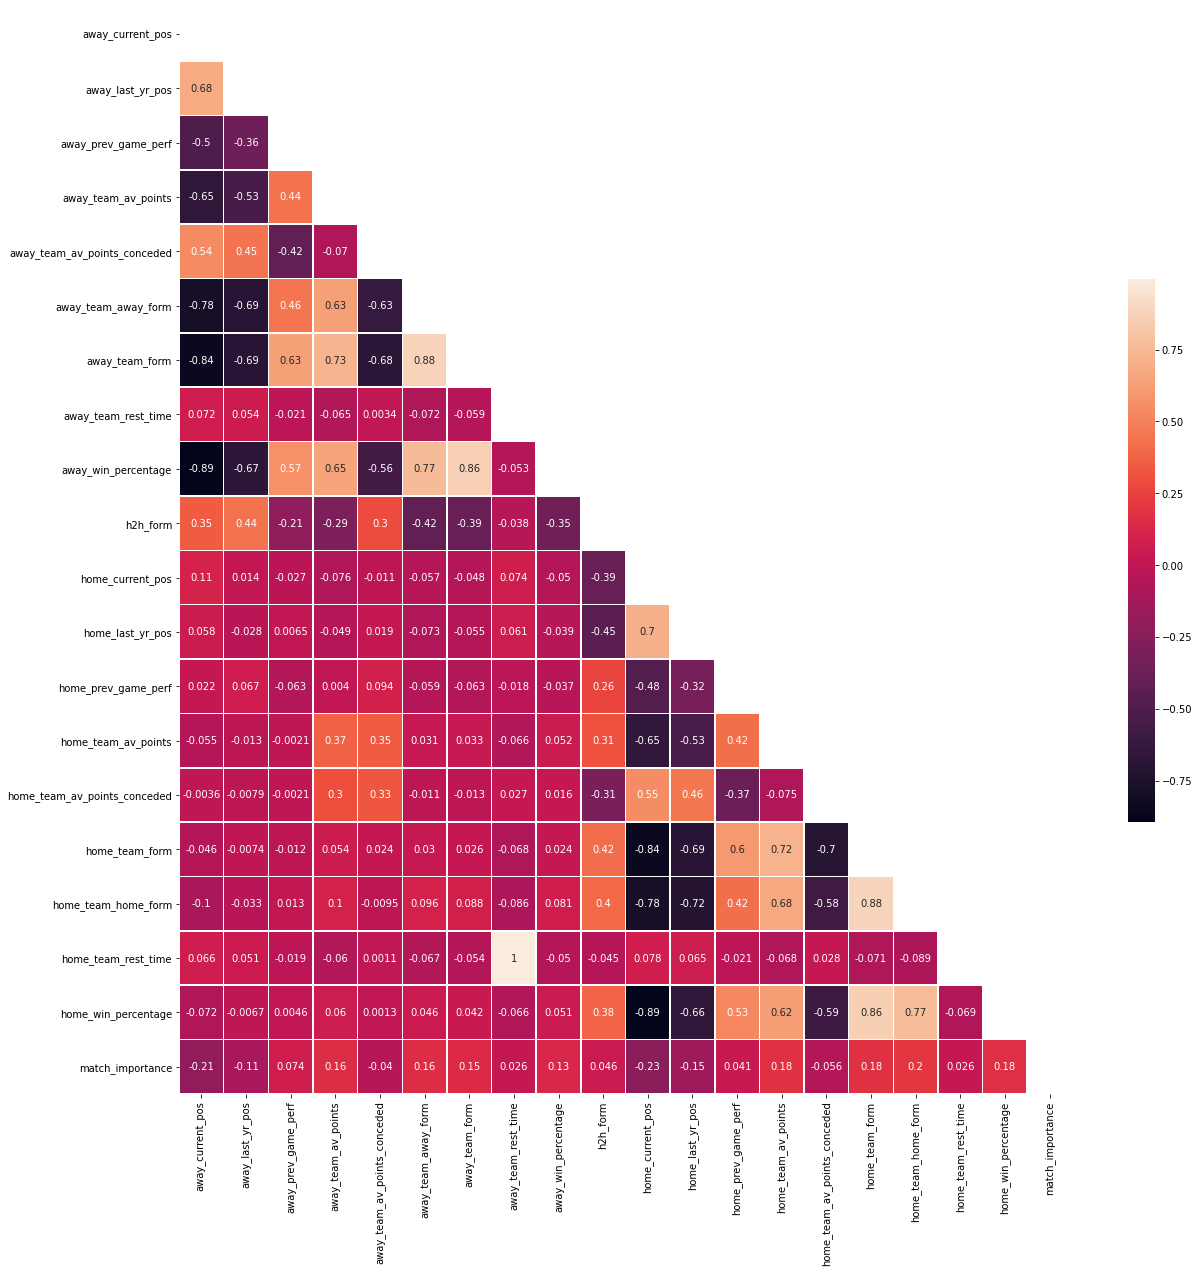

In [42]:
# # Checking Correlation between the columns
# # Compute the correlation matrix
# corr = x_train.corr()

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(20, 20))


# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Draw the heatmap with the mask and correct aspect ratio

# sns.heatmap(corr, mask = mask,linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [43]:
# print(corr.shape)
# print(type(corr))

(20, 20)
<class 'pandas.core.frame.DataFrame'>


In [44]:
# corr

,away_current_pos,away_last_yr_pos,away_prev_game_perf,away_team_av_points,away_team_av_points_conceded,away_team_away_form,away_team_form,away_team_rest_time,away_win_percentage,h2h_form,home_current_pos,home_last_yr_pos,home_prev_game_perf,home_team_av_points,home_team_av_points_conceded,home_team_form,home_team_home_form,home_team_rest_time,home_win_percentage,match_importance
away_current_pos,1.000000,0.683002,-0.504232,-0.654145,0.539973,-0.780486,-0.841734,0.071730,-0.890209,0.349193,0.105172,0.058372,0.022401,-0.055497,-0.003634,-0.045798,-0.100263,0.066366,-0.072491,-0.206987
away_last_yr_pos,0.683002,1.000000,-0.357919,-0.533487,0.450489,-0.694080,-0.690632,0.054328,-0.668744,0.438494,0.014427,-0.028123,0.066541,-0.013316,-0.007860,-0.007388,-0.032820,0.050739,-0.006689,-0.106080
away_prev_game_perf,-0.504232,-0.357919,1.000000,0.442823,-0.416150,0.456881,0.631266,-0.020857,0.566024,-0.208783,-0.026948,0.006504,-0.063164,-0.002122,-0.002132,-0.011865,0.012723,-0.019067,0.004572,0.073770
away_team_av_points,-0.654145,-0.533487,0.442823,1.000000,-0.069811,0.634078,0.731130,-0.064836,0.654564,-0.289226,-0.075888,-0.049311,0.003950,0.370310,0.301062,0.054444,0.101651,-0.060292,0.060230,0.158282
away_team_av_points_conceded,0.539973,0.450489,-0.416150,-0.069811,1.000000,-0.628217,-0.681855,0.003380,-0.560865,0.295170,-0.011108,0.019416,0.094469,0.353516,0.332040,0.024294,-0.009473,0.001089,0.001258,-0.039977
away_team_away_form,-0.780486,-0.694080,0.456881,0.634078,-0.628217,1.000000,0.878744,-0.072251,0.767733,-0.417678,-0.056510,-0.073107,-0.058500,0.030525,-0.011132,0.030447,0.096195,-0.066768,0.046408,0.161388
away_team_form,-0.841734,-0.690632,0.631266,0.731130,-0.681855,0.878744,1.000000,-0.059129,0.860661,-0.390259,-0.048334,-0.054945,-0.062975,0.033319,-0.012962,0.025849,0.087722,-0.054110,0.042079,0.145651
away_team_rest_time,0.071730,0.054328,-0.020857,-0.064836,0.003380,-0.072251,-0.059129,1.000000,-0.053186,-0.037981,0.073743,0.060717,-0.018074,-0.065719,0.026631,-0.067763,-0.085757,0.997606,-0.065501,0.025627
away_win_percentage,-0.890209,-0.668744,0.566024,0.654564,-0.560865,0.767733,0.860661,-0.053186,1.000000,-0.353649,-0.049711,-0.038552,-0.037264,0.051593,0.016428,0.023585,0.080552,-0.049992,0.050683,0.126102
h2h_form,0.349193,0.438494,-0.208783,-0.289226,0.295170,-0.417678,-0.390259,-0.037981,-0.353649,1.000000,-0.391354,-0.447260,0.262751,0.314684,-0.309250,0.419788,0.400279,-0.044776,0.380595,0.046096


In [45]:
# column_name = corr.columns
# print(column_name)
# print(len(column_name))

Index(['away_current_pos', 'away_last_yr_pos', 'away_prev_game_perf',
       'away_team_av_points', 'away_team_av_points_conceded',
       'away_team_away_form', 'away_team_form', 'away_team_rest_time',
       'away_win_percentage', 'h2h_form', 'home_current_pos',
       'home_last_yr_pos', 'home_prev_game_perf', 'home_team_av_points',
       'home_team_av_points_conceded', 'home_team_form', 'home_team_home_form',
       'home_team_rest_time', 'home_win_percentage', 'match_importance'],
      dtype='object')
20


In [46]:
# from IPython import display
# feature1 = []
# feature2 = []
# corr_f1f2 = []
# for i in range(1,len(column_name)):
#   for j in range(0,i):
#     feature1.append(column_name[i])
#     feature2.append(column_name[j])
#     corr_f1f2.append(abs(corr.iloc[i,j]))
#     j = 0;
# corr_pairs = pd.DataFrame(data = feature1, columns = ['feature1'])
# corr_pairs['feature2'] = feature2
# corr_pairs['corr_f1f2'] = corr_f1f2
# corr_pairs = corr_pairs.sort_values(by= ['corr_f1f2'],ascending = False, ignore_index = True)
# display.display(corr_pairs)

,feature1,feature2,corr_f1f2
0,home_team_rest_time,away_team_rest_time,0.997606
1,home_win_percentage,home_current_pos,0.894741
2,away_win_percentage,away_current_pos,0.890209
3,home_team_home_form,home_team_form,0.884079
4,away_team_form,away_team_away_form,0.878744
...,...,...,...
185,away_team_rest_time,away_team_av_points_conceded,0.003380
186,home_team_av_points_conceded,away_prev_game_perf,0.002132
187,home_team_av_points,away_prev_game_perf,0.002122
188,home_win_percentage,away_team_av_points_conceded,0.001258


In [53]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(x_train)
# Apply transform to all the training set,the validation set,the test set.
x_train = scaler.transform(x_train)
X_val = scaler.transform(x_val)
X_test = scaler.transform(x_test)

In [54]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
#Fitting the model on the training set
pca.fit(x_train)
# Apply transform to all the training set,the validation set,the test set.
x_train = pca.transform(x_train)
x_val= pca.transform(x_val)
x_test = pca.transform(x_test)

In [55]:
#Number of features after applying PCA transformation
pca.n_components_

12

# Model Architecture

In [77]:
print('x_train shape',x_train.shape)
print('x_val shape',x_val.shape)
print('x_test shape',x_test.shape)
print('y_train shape',x_train.shape)
print('y_val shape',x_val.shape)
print('y_test shape',x_test.shape)
print('type of x',type(x_train),'type of y',type(y_train))

x_train shape (1032, 12)
x_val shape (258, 12)
x_test shape (258, 12)
y_train shape (1032, 12)
y_val shape (258, 12)
y_test shape (258, 12)
type of x <class 'numpy.ndarray'> type of y <class 'pandas.core.series.Series'>


In [70]:
# Model Building
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
model = keras.Sequential()
model.add(Dense(12, input_shape = (12,)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [71]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________
None


# Model Training

In [72]:
model.compile( optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC()] )

In [79]:
# saved model checkpoint file
best_model_file="./model1.hdf5"
MAX_PATIENT=12
MAX_EPOCHS= 500
BATCH_SIZE=20

callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='val_loss', verbose=1, save_best_only=True)]
# training
history=model.fit(tf.convert_to_tensor(x_train), tf.convert_to_tensor(y_train), 
                  batch_size=BATCH_SIZE, 
                  epochs=MAX_EPOCHS,
                  verbose=1,
                  validation_data=(tf.convert_to_tensor(x_val), tf.convert_to_tensor(y_val)),
                  callbacks=callback) 

Epoch 1/500
37/52 [====================>.........] - ETA: 0s - loss: 0.6017 - accuracy: 0.6757 - auc_2: 0.7473
Epoch 00001: val_loss improved from inf to 4.34859, saving model to ./model1.hdf5
52/52 [==============================] - 0s 7ms/step - loss: 0.5937 - accuracy: 0.6880 - auc_2: 0.7508 - val_loss: 4.3486 - val_accuracy: 0.5930 - val_auc_2: 0.7088
Epoch 2/500
42/52 [=======================>......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7357 - auc_2: 0.7918
Epoch 00002: val_loss improved from 4.34859 to 3.43389, saving model to ./model1.hdf5
52/52 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7345 - auc_2: 0.7959 - val_loss: 3.4339 - val_accuracy: 0.6860 - val_auc_2: 0.7523
Epoch 3/500
38/52 [====================>.........] - ETA: 0s - loss: 0.5284 - accuracy: 0.7395 - auc_2: 0.8076
Epoch 00003: val_loss improved from 3.43389 to 3.27893, saving model to ./model1.hdf5
52/52 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7

# Model Evaluation


Confusion matrix:
 [[98 19]
 [56 85]]
Sensitivity:  0.6028368794326241
Specificity:  0.8376068376068376
PPV:  0.8173076923076923
NPV:  0.6363636363636364


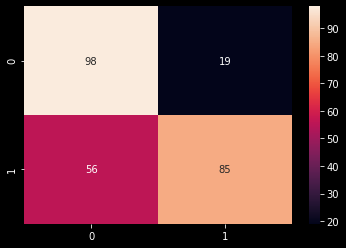

In [87]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
preds = model.predict(x_test)
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=(preds >= 0.5)).numpy() # Change decision threshold here
print('Confusion matrix:\n', confusion_matrix)
print('Sensitivity: ', confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0]))
print('Specificity: ', confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]))
print('PPV' + ': ', confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]))
print('NPV' + ': ', confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]))
sns.heatmap(confusion_matrix, annot=True)

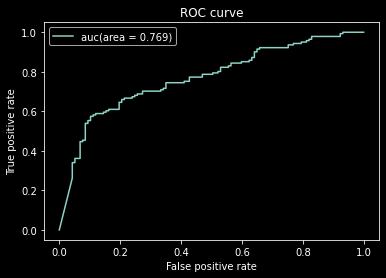

In [89]:
#AU-ROC
from sklearn.metrics import roc_curve,accuracy_score
from sklearn.metrics import auc
plt.style.use('dark_background')

y_pred = model.predict(tf.convert_to_tensor(x_test))

fpr_d, tpr_d, thresholds = roc_curve(y_test, y_pred)
auc_d = auc(fpr_d, tpr_d)
plt.plot(fpr_d, tpr_d, label='auc' + '(area = {:.3f})'.format(auc_d))

    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [90]:
#Accuracy Score
accuracy_score(y_test, y_pred = (preds >= 0.5))

0.7093023255813954

# Extra Utilities

In [ ]:
# from IPython import display
# with pd.option_context('display.max_rows',50,'display.max_columns',90):
#     display.display(input_df)